# Assignment Case 1  
### Ismail Barkın Ulusoy
### Kritameth Coothongkul
### Jiwon Lee  
### Nayoun Kang  
Last edited date: 01.02.2020

### Helsinki Metropolia University of Applied Sciences

#### Our Objective:
The objective is to diagnos if a patient have heart diseases. This is done by using the data 'processed.cleveland.data' 
provided by 'V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.', 
in which the data he provided will be tested and validated through different models and methods of neural networks. 


#### The Data Set:

The dataset provided has a total of 303 instances with each instances having 76 raw attributes, but only 14 attributes are actually used.
Therefore our data shown will show only the 14 used attributes:

#### 1) age:
    age in years       
#### 2) sex: 
    sex (1 = male; 0 = female)     
#### 3) cp: chest pain type  
        -- Value 1: typical angina  
        -- Value 2: atypical angina  
        -- Value 3: non-anginal pain  
        -- Value 4: asymptomatic          
#### 4) trestbps:  
    resting blood pressure (in mm Hg on admission to the hospital)  
#### 5) chol:  
    serum cholestoral in mg/dl         
#### 6) fbs:   
    (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)       
##### 7) restecg:     
    resting electrocardiographic results  
       -- Value 0: normal  
       -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
       -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
##### 8) thalach:   
    maximum heart rate achieved   
#### 9) exang:  
    exercise induced angina (1 = yes; 0 = no)     
#### 10) oldpeak = ST depression induced by exercise relative to rest   
#### 11) slope:  
    the slope of the peak exercise ST segment  
        -- Value 1: upsloping  
        -- Value 2: flat  
        -- Value 3: downsloping   
#### 12) ca:   
    number of major vessels (0-3) colored by flourosopy        
#### 13) thal:  
    3 = normal; 6 = fixed defect; 7 = reversable defect      
#### 14) num:  
    diagnosis of heart disease (angiographic disease status)  
        -- Value 0: < 50% diameter narrowing  
        -- Value 1: > 50% diameter narrowing  
        (in any major vessel: attributes 59 through 68 are vessels)
        
Some of the data fields have missing values which are denoted as "?". 


In [1]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras import regularizers

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


#### Read the dataset and set "?" values to NaN.

In [2]:
filename = r'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(filename,
                 index_col = None,
                header = None,
                na_values = '?')

#### Replace missing values with the mean value  
We decided to go with the mean instead of dropping the rows because of how little data we have, we do not want to lose more.

In [3]:
df.fillna(df.mean(), inplace = True)
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.672241,3.0,0


#### Create labels before scaling
#### The label is the 13th column and has severity of the sickness.  
#### We change it so its either sick = 1 , or notsick = 0 so its easier to compute.

In [4]:
labels = 1.0*(df.loc[:, 13]>0)

#### Create a scaler to fit data into smaller portions and reduce the differences between values. For this we scaled it using StandardScaler which scales the data from -3 to +3

In [5]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,2.274579,-0.723095,0.655818,-0.764198
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,0.649113,2.503851,-0.898522,0.866450
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,0.649113,1.428203,1.173931,0.051126
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,2.274579,-0.723095,-0.898522,-0.764198
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,-0.976352,-0.723095,-0.898522,-0.764198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.046013,0.686202,-2.251775,-1.234430,0.334813,-0.417635,-0.996749,-0.770990,-0.696631,0.138373,0.649113,-0.723095,1.173931,0.051126
299,1.502821,0.686202,0.877985,0.700612,-1.038723,2.394438,-0.996749,-0.376896,-0.696631,2.036303,0.649113,1.428203,1.173931,0.866450
300,0.283813,0.686202,0.877985,-0.096170,-2.238149,-0.417635,-0.996749,-1.515388,1.435481,0.138373,0.649113,0.352554,1.173931,1.681773
301,0.283813,-1.457296,-1.208521,-0.096170,-0.206864,-0.417635,1.016684,1.068113,-0.696631,-0.896862,0.649113,0.352554,-0.898522,0.051126


#### Create data to train  
#### The first 12 columns have the data we want to check

In [6]:
data = df_scaled.loc[:, 0:12]

#### Turn the data and labels into numpy arrays to train the model

In [7]:
labels = np.asarray(labels)
data = np.asarray(data)

#### This part creates the layers and when we tested out all possible "Loss functions , Epochs , Batch sizes,validation_split, optimizers, Activation functions, Dense layer amounts and dense layer numbers".

#### We have provided other settings we have tried but werent as effective as the final model:
- For 'sigmoid' activation , 'binary_crossentropy' loss, 'adagrad' optimizer, 'relu' activation 
  - 4 Dense Layers Consisting of (128,64,32,1)
  - Batch size = 8
  - Validation_split 0.10  
      - The values above have been changed and tested. Overall find is the loss is higher and accuracy is lower compared to "rmsprop". So we started testing with that optimizer "rmsprop".
      
      -Test1 ) We started using 3 layers of 32-32-1 Dense layers and saw that the val_loss would spike very short after starting the training and it was unstable at learning.
      
      -Test2 ) We then tested 3 layers of 64-32-1 Dense layers and saw the same thing.
      
      -Test3 ) We reduced the layers down to 16-16-1 Dense layer and it was very stable at learning and wouldnt overfit instantly like the first 2 tests.
      
      -Test4 ) We then wanted to test out if we could bring in higher values and more layers. But after implementing a Dense layer value higher than 16, the same would happen that happened in test 1 and 2 causing it to overfit almost instantly.
      
      -Test5 ) We tried multiple combinations of 3 layers of 1,8,16 's and also 4 layers of 1,8,16's but all of them almost imedietly lost val_accuracy drastically after 10 epochs
      
      -Test6 ) We also tried using 4 and 5 layers which did not help us and led to the val_accuracy to drop instantly after a few epochs so we realized 3 layers was the way to go.
      
      -Test7 ) We then figgured out that 16 16 1 was the best version to train because of how stable it is and since the number of test data isn't as high , we do not use values more than 16 which cause almost instant overfit. Then we tried to use regularizer to see if we could make it overfit a bit later and it worked. We could extend the training duration without overfiting.           
      - The same was seen when the following optimizers were used with varying hyperparameters:
          - adam
          - adamax
          - adadelta
          - nadam  
          
    ### - At the end we settled on:
        - rmsprop optimizer
        - 3 Dense layers consisting of 16(regularized)(relu) ,16(relu) ,1(sigmoid)
        - with batch number of 8 
        - validation_spli of 10%


In [8]:
model = Sequential()

model.add(Dense(16,kernel_regularizer=regularizers.l2(0.001),input_dim = 13, activation='relu'))
model.add(Dense(16, activation= 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.compile(optimizer = 'rmsprop',loss='binary_crossentropy', metrics=['accuracy'])


#### We used 10% of the data to validate itself and we found that number to be the most efficient and stable

##### So in total 272 was for training and 31 was for validating.

In [10]:
network = model.fit(data, labels, epochs = 50, batch_size = 8, validation_split = 0.10)

Train on 272 samples, validate on 31 samples
Epoch 1/50
272/272 [==============================] - 2s 8ms/sample - loss: 0.7224 - accuracy: 0.5404 - val_loss: 0.6266 - val_accuracy: 0.6774
Epoch 2/50
272/272 [==============================] - 0s 614us/sample - loss: 0.6263 - accuracy: 0.6875 - val_loss: 0.5730 - val_accuracy: 0.7742
Epoch 3/50
272/272 [==============================] - 0s 612us/sample - loss: 0.5505 - accuracy: 0.7868 - val_loss: 0.5356 - val_accuracy: 0.8065
Epoch 4/50
272/272 [==============================] - 0s 611us/sample - loss: 0.4873 - accuracy: 0.8162 - val_loss: 0.5053 - val_accuracy: 0.8065
Epoch 5/50
272/272 [==============================] - 0s 611us/sample - loss: 0.4410 - accuracy: 0.8346 - val_loss: 0.4864 - val_accuracy: 0.8387
Epoch 6/50
272/272 [==============================] - 0s 622us/sample - loss: 0.4093 - accuracy: 0.8419 - val_loss: 0.4858 - val_accuracy: 0.8387
Epoch 7/50
272/272 [==============================] - 0s 614us/sample - loss: 0.3

#### This section contains all the visualizations of the values according to the epochs in the network.

<function show at 0x1130c4f80>


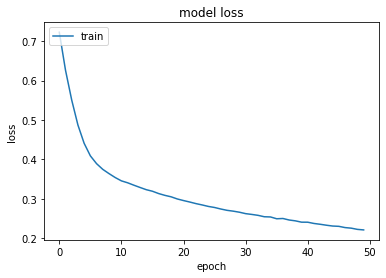

In [11]:
plt.plot(network.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
print(plt.show)

From the model loss graph you can see that the loss of the neural network in contrast to the data gets lower as you increase the epoch. But this has some isues with overfitting which will be descussed later on.

<function show at 0x1130c4f80>


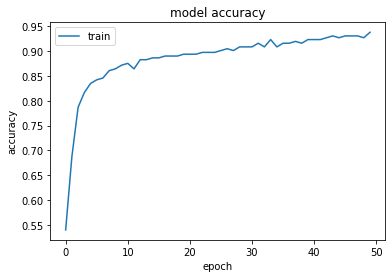

In [12]:
plt.plot(network.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
print(plt.show)

Just like in the graph before which was the loss graph, the accuracy graph can be described as the accuracy of how correct the network can guess if someone is sick or not in contrast to the data.

<function show at 0x1130c4f80>


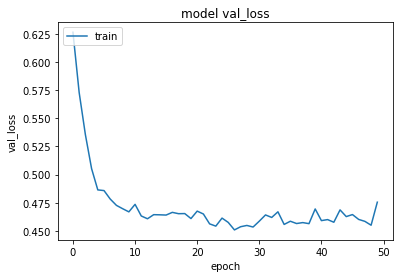

In [13]:
plt.plot(network.history['val_loss'])
plt.title('model val_loss')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
print(plt.show)

The validation loss also gets lower when you increase epochs. But when we take a look at the graph we can see that it isnt stable like the our model loss. From this we can see that around 25 epochs is where we get the best validation loss.The validation loss is computed by crosschecking the neural network with the validation data we have split while doing our training.

<function show at 0x1130c4f80>


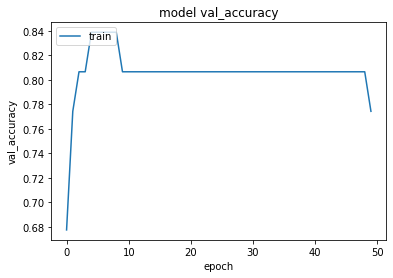

In [14]:
plt.plot(network.history['val_accuracy'])
plt.title('model val_accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
print(plt.show)

From the last graph we can see how accurate our neural network is when it is compared to the validation data. We can see that after 8 epochs and 46 epochs our accuracies goes lower because of the data overfitting. The best accuracy is around 5 epochs.  
The validation accuracy may change since the training step takes at random data.

### Conclusions

In conclusion we observed that every data set has their own settings and ways to deal with and train our network. Our objective was to train a network to find people who have heart problems.  
  
This goal has been achieved by checking several settings and parameters of the neural network. We saw that using a specific setting for each dataset was not valid and we had to try other settings out. 
  
Thanks to this we have trained our network and have achieved a good accuracy in our validation data which means we could safely use it for real life scenarios seeing if a person has a heart disease using this network as a helping tool.  
  
The training could be better if we had more data on hand but we think with the data we have this was a clear win in our eyes.